<a href="https://colab.research.google.com/github/arumajirou/-daily-test/blob/main/Darts_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dartsとは

---
時系列の操作と予測を簡単に行うためのPythonライブラリです。

---


*   ARIMAのような古典的なものからディープニューラルネットワークまで様々なモデルが含まれています。 

*   これらのモデルはscikit-learnと同様にfit()とpredict()関数を使って同様に使用することができます。
*   また、このライブラリでは、モデルのバックテスト、複数のモデルの予測の結合、外部データの考慮が簡単にできます。 


*    Dartsは一変量と多変量の時系列とモデルの両方をサポートしています。


*   MLベースのモデルは、複数の時系列を含む大規模データセットで学習でき、モデルの中には確率的 予測のサポートを豊富に提供するものがあります。

<br>


*   クイックスタート
https://unit8co.github.io/darts/quickstart/00-quickstart.html

*   ユーザーガイド
https://unit8co.github.io/darts/userguide.html

*   APIリファレンス
https://unit8co.github.io/darts/generated_api/darts.html

*   事例紹介
https://unit8co.github.io/darts/examples.html




# Dartsのインストール

In [ ]:
!pip install darts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#自動的にpythonファイルをリロードするよう、以下のコマンドを設定しています。
%load_ext autoreload
#タイプされたPythonコードを実行する前に、
#毎回すべてのモジュール（%aimportで除外されたものを除く）を再ロードします。
%autoreload 2

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#TimeSeriesはDartsの主要なデータクラスです。TimeSeriesは適切な時間インデックスを持つ一変量または多変量の時系列を表します。
from darts import TimeSeries
from darts.datasets import AirPassengersDataset

# 時系列の構築と操作¶。
TimeSeriesはDartsの主要なデータクラスです。TimeSeriesは適切な時間インデックスを持つ一変量または多変量の時系列を表します。時間インデックスはpandas.DatetimeIndex（日付時間を含む）か、pandas.RangeIndex（整数を含む、特定のタイムスタンプのない連続したデータを表すのに便利）タイプです。場合によっては、TimeSeriesは信頼区間を得るために、確率的な系列を表現することもできます。Dartsの全てのモデルはTimeSeriesを消費し、TimeSeriesを生成する。

# データを読み込んで時系列を構築する¶。
時系列はいくつかのファクトリーメソッドを使って簡単に構築することができます。

- PandasDataFrame全体から、TimeSeries.from_dataframe()を使用します（docs）。

- TimeSeries.from_times_and_values()(docs) を使って、時間インデックスとそれに対応する値の配列から取得します。

- TimeSeries.from_values()(ドキュメント)を使用して、NumPyの配列から値を取得します。

- Pandasのシリーズから、TimeSeries.from_series()を使用する(docs)。

- TimeSeries.from_xarray()を使用して、xarray.DataArrayから取得します(docs)。

- TimeSeries.from_csv()を使ってCSVファイルから取得します（docs）。

以下では、Dartsで利用可能なデータセットの1つから航空旅客の系列を直接ロードして時系列を取得します。

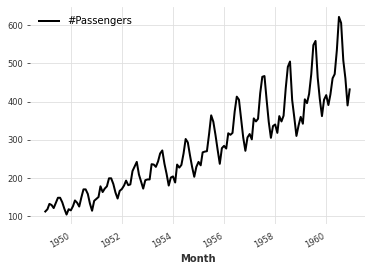

In [ ]:
series = AirPassengersDataset().load()
series.plot()

# いくつかの時系列の操作¶。
時系列は様々な種類の操作をサポートしています。ここではいくつかの例をご紹介します。

**分割**

また、シリーズの端数、pandasTimestamp、整数のインデックス値で分割することも可能です。

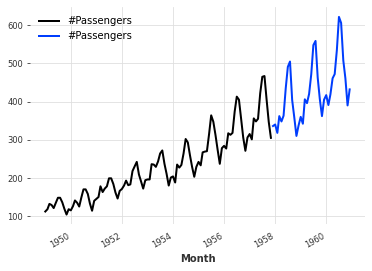

In [ ]:
series1, series2 = series.split_before(0.75)
series1.plot()
series2.plot()

## スライシングを行います。

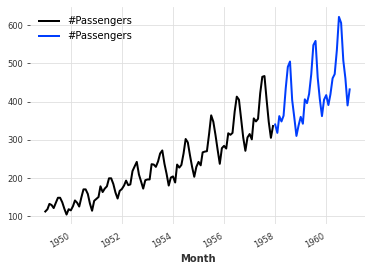

In [ ]:
series1, series2 = series[:-36], series[-36:]
series1.plot()
series2.plot()

## 算術演算

In [ ]:
series.time_index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [ ]:
 np.random.randn(len(series))

array([-1.07430872,  0.44926556, -0.37584303, -0.06775623, -0.0470614 ,
       -0.64979639, -0.01982199, -1.50279723,  1.25353235, -0.12102084,
       -1.49120846, -0.22374513,  0.92656399, -1.68675462,  1.28574799,
       -1.27903606, -0.51118748,  0.90676216, -0.32132833,  2.53386105,
       -1.25169633,  0.02144109, -1.2627461 ,  2.14883631,  1.21276404,
        0.3673969 , -0.90583499,  0.75346269, -0.62618452,  0.00741452,
        1.20351563, -0.74352467,  0.68085738,  0.42468406, -0.66805655,
        0.50386176,  0.82292868, -0.80884078, -0.22249672, -0.51412426,
        0.32137597,  0.11318697, -0.47049653,  0.03202181,  0.04599665,
        0.62927551, -0.40532619, -2.02199364,  0.24959984,  0.67521486,
       -0.39372128,  1.0751454 ,  0.41767251, -1.20721749,  0.19448535,
       -1.61829133, -1.86550312,  2.36890775,  0.31612814, -0.66283273,
        2.71995216,  0.94831886,  0.47981819, -0.8684657 ,  1.03972477,
       -1.03265655, -0.30190879, -0.38343306, -0.87465608,  1.58

In [ ]:
series

<TimeSeries (DataArray) (Month: 144, component: 1, sample: 1)>
array([[[112.]],

       [[118.]],

       [[132.]],

       [[129.]],

       [[121.]],

       [[135.]],

       [[148.]],

       [[148.]],

       [[136.]],

       [[119.]],

...

       [[419.]],

       [[461.]],

       [[472.]],

       [[535.]],

       [[622.]],

       [[606.]],

       [[508.]],

       [[461.]],

       [[390.]],

       [[432.]]])
Coordinates:
  * Month      (Month) datetime64[ns] 1949-01-01 1949-02-01 ... 1960-12-01
  * component  (component) object '#Passengers'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

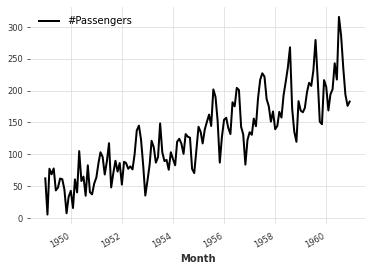

In [ ]:
series_noise = TimeSeries.from_times_and_values(
    series.time_index, np.random.randn(len(series))
)
(series / 2 + 20 * series_noise - 10).plot()

# かさなり

新しい次元を連結して、新しい単一の多変量系列を生成する。

In [ ]:
series_noise

<TimeSeries (DataArray) (Month: 144, component: 1, sample: 1)>
array([[[ 0.8011184 ]],

       [[-2.19200325]],

       [[ 1.05875486]],

       [[ 0.69722676]],

       [[ 1.35757489]],

       [[-0.7182977 ]],

       [[-0.82466137]],

       [[-0.10803972]],

       [[ 0.13438873]],

       [[-0.23667789]],

...

       [[-0.2725245 ]],

       [[-0.91281272]],

       [[ 0.84926525]],

       [[-2.00587173]],

       [[ 0.74414225]],

       [[-0.3383067 ]],

       [[-0.44250659]],

       [[-1.33102709]],

       [[-0.44757008]],

       [[-1.16337644]]])
Coordinates:
  * Month      (Month) datetime64[ns] 1949-01-01 1949-02-01 ... 1960-12-01
  * component  (component) <U1 '0'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [ ]:
series

<TimeSeries (DataArray) (Month: 144, component: 1, sample: 1)>
array([[[112.]],

       [[118.]],

       [[132.]],

       [[129.]],

       [[121.]],

       [[135.]],

       [[148.]],

       [[148.]],

       [[136.]],

       [[119.]],

...

       [[419.]],

       [[461.]],

       [[472.]],

       [[535.]],

       [[622.]],

       [[606.]],

       [[508.]],

       [[461.]],

       [[390.]],

       [[432.]]])
Coordinates:
  * Month      (Month) datetime64[ns] 1949-01-01 1949-02-01 ... 1960-12-01
  * component  (component) object '#Passengers'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

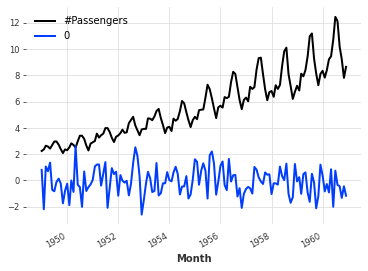

In [ ]:
(series / 50).stack(series_noise).plot()

## マッピングを行います。

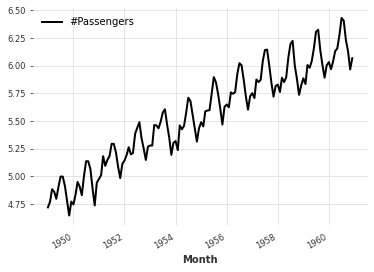

In [ ]:
series.map(np.log).plot()

## タイムスタンプと値の両方にマッピングします。

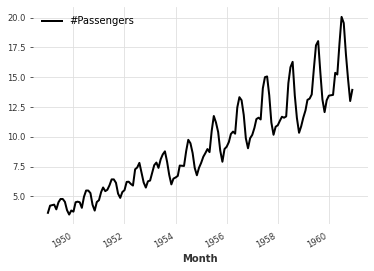

In [ ]:
series.map(lambda ts, x: x / ts.days_in_month).plot()

## 追加次元としてdatetime属性を追加する(多変量系列が得られる)。

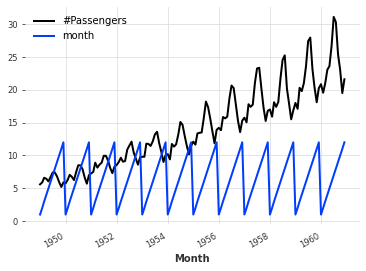

In [ ]:
(series / 20).add_datetime_attribute("month").plot()

## 何らかのバイナリーホリデーコンポーネントを追加する。

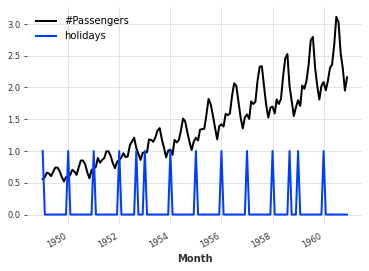

In [ ]:
(series / 200).add_holidays("US").plot()

## ディファレンシングを行います。


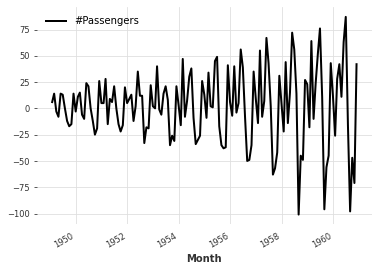

In [ ]:
series.diff().plot()

# 欠損値を埋める (``utils`` 関数を使用).

欠測値はnp.nanで表現しています。

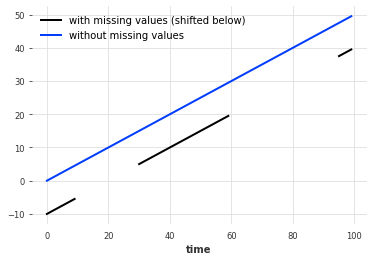

In [ ]:
from darts.utils.missing_values import fill_missing_values

values = np.arange(50, step=0.5)
values[10:30] = np.nan
values[60:95] = np.nan
series_ = TimeSeries.from_values(values)

(series_ - 10).plot(label="with missing values (shifted below)")
fill_missing_values(series_).plot(label="without missing values")

# トレーニングシリーズとバリデーションシリーズを作成する¶。
以下では、TimeSeriesをトレーニング用と検証用に分割します。注：一般的には、テスト用シリーズを脇に置いておき、プロセスの最後まで触らないようにするのも良い方法です。ここでは、単純化するために、学習用と検証用のシリーズを作成します。

学習用系列は1958年1月までの値（除外）を含むTimeSeries、検証用系列はそれ以外を含むTimeSeriesとする。

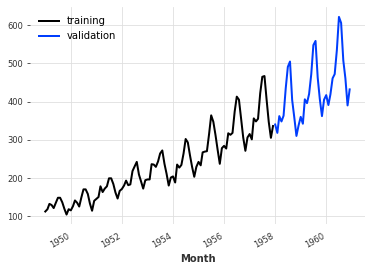

In [ ]:
#学習用系列は1958年1月までの値
train, val = series.split_before(pd.Timestamp("19580101"))
train.plot(label="training")
val.plot(label="validation")

# 予測モデルの学習と予測¶。
# おもちゃの模型で遊ぶ¶。
Dartsには「ナイーブな」ベースラインモデルのコレクションがあり、期待できる最低限の精度のアイデアを得るのに非常に便利です。例えば、NaiveSeasonal(K)モデルは常にK時間ステップ前に発生した値を「繰り返し」ます。

最も素朴な形であるK=1では、このモデルは常に学習系列の最後の値を繰り返すだけである。

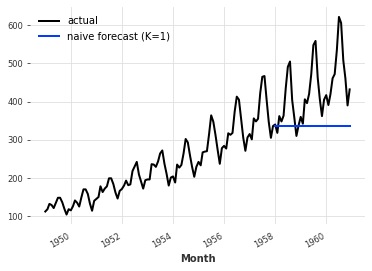

In [ ]:
from darts.models import NaiveSeasonal

naive_model = NaiveSeasonal(K=1)
naive_model.fit(train)
naive_forecast = naive_model.predict(36)

series.plot(label="actual")
naive_forecast.plot(label="naive forecast (K=1)")

時系列にモデルを当てはめ、予測を行うのはとても簡単です。すべてのモデルにはfit()とpredict()関数があります。これはScikit-learnに似ていますが、時系列に特化している点が異なります。fit()関数はモデルを当てはめるための学習用時系列を引数に取り、predict()関数は予測を行うための（学習用時系列の終了後の）時間ステップ数を引数に取ります。

## 季節性を検査する¶。
上記のモデルは、おそらく少し素朴すぎるのではないでしょうか。データの季節性を利用することで、すでに改善することができます。このデータが1年ごとの季節性を持っていることは明らかで、自己相関関数（ACF）を見て、ラグm=12を強調することで確認することができます。

# 自己相関関数（ACF）
Minitab Statistical Software についての 詳細
自己相関関数は、k時間単位離れた時系列の観測値間の相関（ytとyt-k）を表す測度です。

# 解釈
自己相関関数と偏自己相関関数を併用して、ARIMAモデルを特定します。各遅れでのスパイクを調べ、それらのスパイクが有意かどうか判断します。有意なスパイクは有意限界を越えて広がっており、これは、その遅れの相関がゼロにならないことを示します。

以下のパターンに基づいて、ARIMAモデルでの自己回帰項とMA項を指定できます。

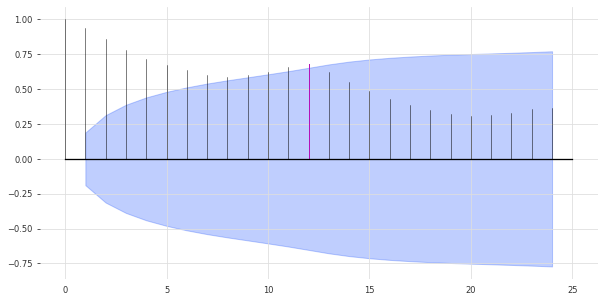

In [ ]:
from darts.utils.statistics import plot_acf, check_seasonality

plot_acf(train, m=12, alpha=0.05)

ACFはx = 12でスパイクを示し、これは年間の季節性傾向を示唆している（赤でハイライト）。青い領域は、信頼水準が .また、各候補期間mについて季節性の統計的チェックを行うことができます。

In [ ]:
for m in range(2, 25):
    print(m)
    is_seasonal, period = check_seasonality(train, m=m, alpha=0.05)
    if is_seasonal:
        print("季節性があります {}.".format(period))#上図ピンクの線

2
3
4
5
6
7
8
9
10
11
12
季節性があります 12.
13
14
15
16
17
18
19
20
21
22
23
24


## より素朴なモデル¶。
季節性を12としたNaiveSeasonalモデルを再度試してみましょう。

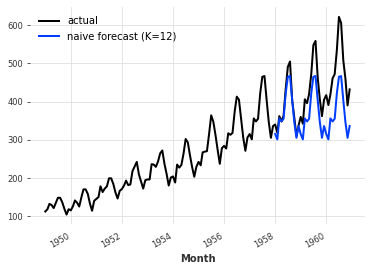

In [ ]:
#季節性を12としたNaiveSeasonalモデル
seasonal_model = NaiveSeasonal(K=12)
seasonal_model.fit(train)
seasonal_forecast = seasonal_model.predict(36)

series.plot(label="actual")
seasonal_forecast.plot(label="naive forecast (K=12)")

これはより良い方法ですが、まだトレンドを見逃しています。幸いなことに、トレンドを捉えるもう一つのナイーブなベースラインモデルがあり、それはNaiveDriftと呼ばれています。このモデルは単純に線形予測を行い、その傾きはトレーニングセットの最初と最後の値によって決定されます。

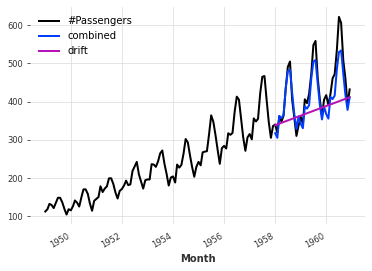

In [ ]:
from darts.models import NaiveDrift

drift_model = NaiveDrift()
drift_model.fit(train)
drift_forecast = drift_model.predict(36)

combined_forecast = drift_forecast + seasonal_forecast - train.last_value()

series.plot()
combined_forecast.plot(label="combined")
drift_forecast.plot(label="drift")

そこで何が起こったのでしょうか？単純にナイーブドリフトモデルをフィットさせ、その予測を以前持っていた季節予測に追加します。また、その結果からトレーニングセットの最後の値を引き、結果として得られる複合予測が正しいオフセットで開始されるようにします。

# エラーメトリクスの計算¶。
これはもう、かなりまともな予報のようで、まだ未熟なモデルは使っていません。実際、どんなモデルでもこれを上回ることができるはずです。

では、私たちが打ち勝たなければならない誤差は何でしょうか？ここではMean Absolute Percentage Error (MAPE)(平均絶対値誤差)を使います（実際にはMAPEを使わない理由もよくありますが、ここでは非常に便利で規模に依存しないので使っています）。Dartsでは、これは単純な関数呼び出しです。

In [ ]:
from darts.metrics import mape

print(
    "結合された単純なドリフト + 季節の絶対パーセント誤差の平均: {:.2f}%.".format(
        mape(series, combined_forecast)
    )
)

結合された単純なドリフト + 季節の絶対パーセント誤差の平均: 5.66%.


darts.metricsには時系列を比較するためのもっとたくさんのメトリクスが含まれています。このメトリクスは、2つの系列が整列していない場合に、系列の共通のスライスだけを比較し、多数の系列のペアで計算を 並列化します - しかし、先走るのはやめましょう。

# 複数のモデルを素早く試す¶。
Dartsは複数のモデルの学習と検証を統一的な方法で簡単に行えるように作られています。さらにいくつかのモデルを学習させ、検証セットでそれぞれのMAPEを計算してみましょう。

In [ ]:
from darts.models import ExponentialSmoothing, TBATS, AutoARIMA, Theta


def eval_model(model):
    model.fit(train)
    forecast = model.predict(len(val))
    print("model {} obtains MAPE: {:.2f}%".format(model, mape(val, forecast)))


eval_model(ExponentialSmoothing())
eval_model(TBATS())
eval_model(AutoARIMA())
eval_model(Theta())

model ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=SeasonalityMode.ADDITIVE, seasonal_periods=12 obtains MAPE: 5.11%
model (T)BATS obtains MAPE: 5.87%
model Auto-ARIMA obtains MAPE: 11.65%
model Theta(2) obtains MAPE: 8.15%


ここでは、これらのモデルをデフォルトのパラメータで構築したに過ぎません。私たちの問題に合わせて微調整すれば、もっとうまくいくはずです。シータ法でやってみましょう。

# **シータ法によるハイパーパラメータの探索¶。**
モデルThetaはAssimakopoulosとNikolopoulosのThetaメソッドの実装を含んでいます。この方法は、特にM3-competitionで成功を収めています。

Theta パラメータの値は、アプリケーションでは0に設定されることが多いのですが、我々の実装では、パラメータチューニングの目的で可変値をサポートしています。それでは、Thetaの良い値を探してみましょう。

In [ ]:
# 50種類の値を試して、最適なθパラメータを探す
thetas = 2 - np.linspace(-10, 10, 50)

best_mape = float("inf")
best_theta = 0

for theta in thetas:
    model = Theta(theta)
    model.fit(train)
    pred_theta = model.predict(len(val))
    res = mape(val, pred_theta)

    if res < best_mape:
        best_mape = res
        best_theta = theta

In [ ]:
best_theta_model = Theta(best_theta)
best_theta_model.fit(train)
pred_best_theta = best_theta_model.predict(len(val))

print(
    "The MAPE is: {:.2f}, with theta = {}.".format(
        mape(val, pred_best_theta), best_theta
    )
)

The MAPE is: 4.40, with theta = -3.5102040816326543.


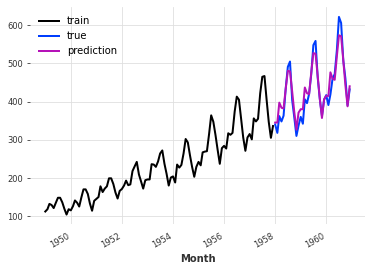

In [ ]:
train.plot(label="train")
val.plot(label="true")
pred_best_theta.plot(label="prediction")